# Лабка №3

### Завдання

1) Ознайомитися із усіма теоретичними відомостями до лабораторної роботи.
2) Виконати проєктування програмного додатку для PC, який:
    - виконує інвертування кольорової інтенсивності пікселів завантаженого користувачем зображення. Вивести вхідне та отримане зображення;
    - для деякої (однієї з трьох) компонент виконує зміну, наприклад, до кожного пікселя додає якесь постійне значення. Вивести зображення в об'єкти типу ImageView;
    - виконує розбивку зображення на компоненти Red, Green та Blue;
    - виконує "злиття" двох зображень у певних пропорціях (долях від одиниці, яка береться за 100%). Наприклад, якщо "вклад" першого зображення у нове складає 0.4, то "вклад" другого -- 1 - 0.4 = 0.6. У загальному "вклад" першого зображення позначимо через $\alpha$, а "вклад" другого -- $(1 - \alpha)$. Тоді шукане зображення можна записати у наступному вигляді: $$\text{Image}_\text{new}=\alpha \cdot \text{Image}_\text{1} + (1 - \alpha) \cdot \text{Image}_\text{2}$$
    За додаткові бали передбачити те, що $\alpha$ -- змінна величина, $\alpha \in (0; 1)$. Крок зміни обрати самостійно. Вивести анімацію зображень на екран програмного застосунку.
    - виконує фільтрацію вхідного зображення з використанням матричних фільтрів, що описані у лабораторній роботі (фільтр розмиття, фільтр поліпшення чіткості, медіанний фільтр, фільтр ерозії і нарощування та фільтр Собеля).
    - виконує вбудовування водяного знаку зображення. Для процесу вбудовування водяний знак перетворити до бінарного (чорно-білого, не сірого!). Використати для вбудовування метод найменшого значущого біта. Параметр "номер бітовох площини" (натуральне число, менше за 9) вивести на форму головного вікна для відображення різниці в результатах вбудовування. Водяний знак вбудовувати у канал *Blue*. Передбачити випадок різних розмірів вхідного зображення (контейнера) та водяного знаку. Якщо вхідне зображення більше за водяний знак, виконати вбудовування циклічно та періодично для всього вхідного зображення (замостити вхідне зображення водяним знаком). Якщо вхідне зображення менше за водяний знак, вбудувати частину водяного знаку для всього вхідного зображення.
    - Додатковий бал передбачається з створення методу, який виконує вилучення водяного знаку із заповненого контейнера (зображення з водяним знаком) для завдання 7 даної лабораторної роботи.

In [232]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [233]:
img1 = cv2.imread("imgs/kodim01.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("imgs/kodim07.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

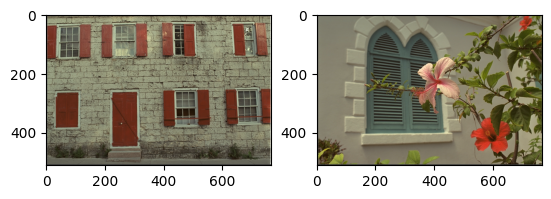

In [234]:
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2)

## Інвертування

In [235]:
def invert(img: np.ndarray) -> np.ndarray:
    return 255 - img

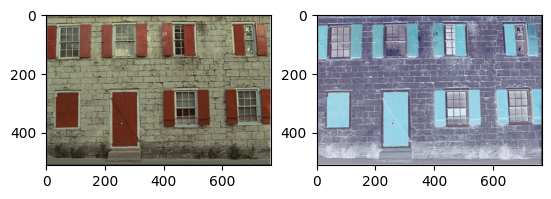

In [236]:
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(invert(img1))

## Модифікація параметра

In [237]:
def mod_param(img: np.ndarray) -> np.ndarray:
    channel = 2
    mod = 20
    mod_img = img[:, :, channel] + mod
    mod_img = mod_img.clip(0, 255)
    return mod_img

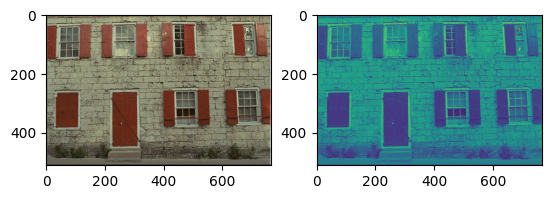

In [238]:
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(mod_param(img1))

## Розбиття на канали

In [239]:
def rgb_breakdown(img: np.ndarray) -> np.ndarray:
    r_img = np.zeros_like(img)
    g_img = np.zeros_like(img)
    b_img = np.zeros_like(img)
    r_img[:, :, 0] = img[:, :, 0]
    g_img[:, :, 1] = img[:, :, 1]
    b_img[:, :, 2] = img[:, :, 2]
    
    return r_img, g_img, b_img

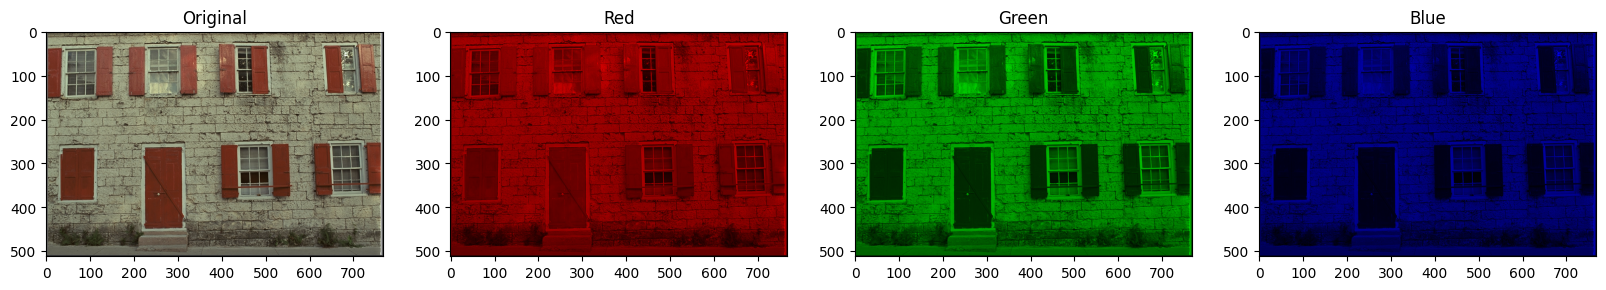

In [240]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
r_img, g_img, b_img = rgb_breakdown(img1)

axs[0].set_title("Original")
axs[0].imshow(img1)

axs[1].set_title("Red")
axs[1].imshow(r_img)

axs[2].set_title("Green")
axs[2].imshow(g_img)

axs[3].set_title("Blue")
axs[3].imshow(b_img)


## Злиття

In [241]:
def fusion(img1: np.ndarray, img2: np.ndarray, alpha: float = .4) -> np.ndarray:
    return (alpha*img1 + (1 - alpha)*img2).clip(0, 255).astype(int)

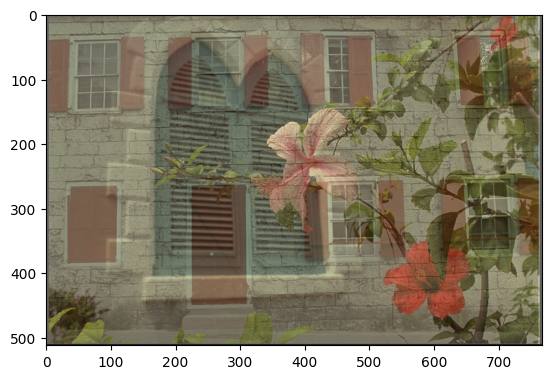

In [242]:
plt.imshow(fusion(img1, img2))

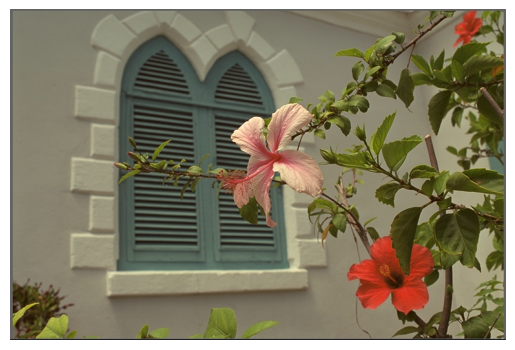

In [243]:
from matplotlib.animation import FuncAnimation

alphas = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
image_plot = ax.imshow(fusion(img1, img2, alphas[0]))

ax.axis("off")  # прибрати осі

def update(frame):
    image_plot.set_data(fusion(img1, img2, alphas[frame]))
    return [image_plot]

ani = FuncAnimation(fig, update, frames=len(alphas), interval=50, blit=False)

# Збереження GIF
ani.save("fusion.gif")

## Фільтри

In [244]:
def filter_applier(img: np.ndarray, kernel: np.ndarray=None, mode=None) -> np.ndarray:
    filtered = np.zeros_like(img)
    match mode:
        case None:
            kernel_size = kernel.shape[0]//2
            padded = np.pad(img, ((kernel_size, kernel_size), 
                                (kernel_size, kernel_size), 
                                (0          , 0         )), 
                            mode='edge')
            
            for channel in range(img.shape[2]):
                for x in range(img.shape[0]):
                    for y in range(img.shape[1]):
                        region = padded[x:x+kernel.shape[0], y:y+kernel.shape[1], channel]
                        filtered[x, y, channel] = np.sum(region*kernel)
        case "median":
            ks = 3
            padded = np.pad(img, ((ks, ks), 
                                (ks, ks), 
                                (0, 0)), 
                            mode='edge')
            for channel in range(img.shape[2]):
                for x in range(img.shape[0]):
                    for y in range(img.shape[1]):
                        region = padded[x:x+ks, y:y+ks, channel]
                        filtered[x, y, channel] = np.median(region)
        case "erosion":
            kernel_size = kernel.shape[0]//2
            padded = np.pad(img, ((kernel_size, kernel_size), 
                                (kernel_size, kernel_size), 
                                (0          , 0         )), 
                            mode='edge')
            
            for channel in range(img.shape[2]):
                for x in range(img.shape[0]):
                    for y in range(img.shape[1]):
                        region = padded[x:x+kernel.shape[0], y:y+kernel.shape[1], channel]
                        region = np.where(kernel, region, 255)
                        filtered[x, y, channel] = np.min(region)
        case "dilation":
            kernel_size = kernel.shape[0]//2
            padded = np.pad(img, ((kernel_size, kernel_size), 
                                (kernel_size, kernel_size), 
                                (0          , 0         )), 
                            mode='edge')
            
            for channel in range(img.shape[2]):
                for x in range(img.shape[0]):
                    for y in range(img.shape[1]):
                        region = padded[x:x+kernel.shape[0], y:y+kernel.shape[1], channel]
                        region = np.where(kernel, region, 0)
                        filtered[x, y, channel] = np.max(region)
        case "Sobel":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
            kernel_size = kernel.shape[0]//2
            padded = np.pad(img, ((kernel_size, kernel_size), 
                                (kernel_size, kernel_size)), 
                            mode='edge')

            for x in range(img.shape[0]):
                for y in range(img.shape[1]):
                    region = padded[x:x+kernel.shape[0], y:y+kernel.shape[1]]
                    gx = np.sum(region*kernel)
                    gy = np.sum(region*kernel.T)
                    filtered[x, y] = np.sqrt(gx**2 + gy**2)
    filtered = np.clip(filtered, 0, 255).astype(np.uint8)
    return filtered

In [245]:
kernel_blur = np.array([[.000789, .006581, .013347, .006581, .000789], 
                        [.006581, .054901, .111345, .054901, .006581], 
                        [.013347, .111345, .225821, .111345, .013347], 
                        [.006581, .054901, .111345, .054901, .006581], 
                        [.000789, .006581, .013347, .006581, .000789]])

kernel_sharpness = np.array([[-1, -1, -1], 
                             [-1,  9, -1], 
                             [-1, -1, -1]])

kernel_ed = np.array([[0, 0, 1, 0, 0], 
                      [0, 1, 1, 1, 0], 
                      [1, 1, 1, 1, 1], 
                      [0, 1, 1, 1, 0], 
                      [0, 0, 1, 0, 0]])

kernel_sobel = np.array([[1, 2, 1], 
                         [0, 0, 0], 
                         [-1, -2, -1]])

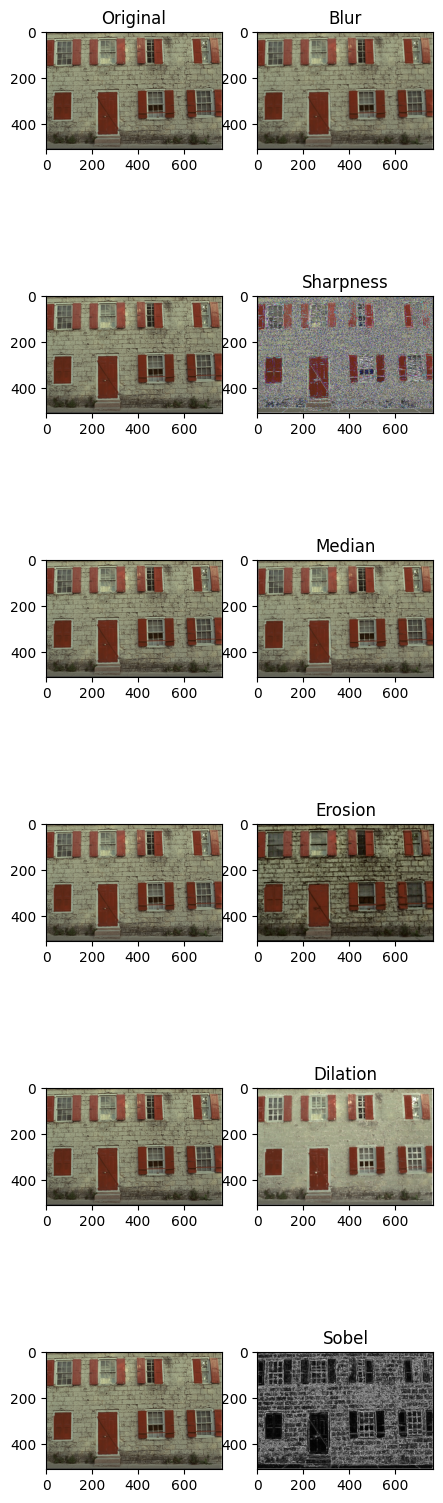

In [246]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(5, 20))

axs[0, 0].set_title("Original")
axs[0, 0].imshow(img1)
axs[1, 0].imshow(img1)
axs[2, 0].imshow(img1)
axs[3, 0].imshow(img1)
axs[4, 0].imshow(img1)
axs[5, 0].imshow(img1)


axs[0, 1].set_title("Blur")
axs[0, 1].imshow(filter_applier(img1, kernel_blur))

axs[1, 1].set_title("Sharpness")
axs[1, 1].imshow(filter_applier(img1, kernel_sharpness))

axs[2, 1].set_title("Median")
axs[2, 1].imshow(filter_applier(img1, mode="median"))

axs[3, 1].set_title("Erosion")
axs[3, 1].imshow(filter_applier(img1, kernel_ed, mode="erosion"))

axs[4, 1].set_title("Dilation")
axs[4, 1].imshow(filter_applier(img1, kernel_ed, mode="dilation"))

axs[5, 1].set_title("Sobel")
axs[5, 1].imshow(filter_applier(img1, kernel_sobel, mode="Sobel"))


## Водяний знак

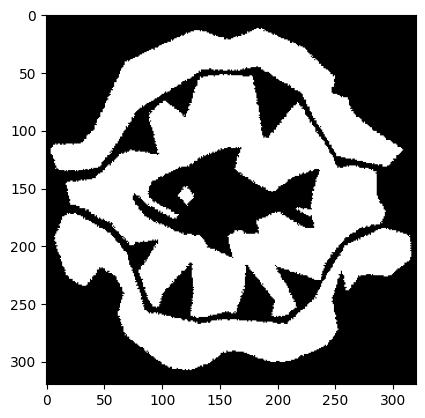

In [247]:
wm = cv2.imread("imgs/watermark.png")
wm = cv2.cvtColor(wm, cv2.COLOR_BGR2GRAY)
wm[wm <= 128] = 0.0
wm[wm > 128] = 1.0
plt.imshow(wm, cmap="gray")

In [248]:
def get_resized_wm(wm: np.ndarray, resized_shape: tuple) -> np.ndarray:
    resized_wm = np.zeros(resized_shape)
    h, w = wm.shape[:2]
    dh = resized_shape[0]/wm.shape[0]
    dw = resized_shape[1]/wm.shape[1]
    
    for i in range( int(np.ceil(dh)) ):
    
        if (i + 1) * h > resized_shape[0]:
            border_height = resized_shape[0]
        else:
            border_height = (i + 1) * h
    
        for j in range( int(np.ceil(dw)) ):
    
            if (j + 1) * w > resized_shape[1]:
                border_width = resized_shape[1]
            else:
                border_width = (j + 1) * w
    
            resized_wm[i * h: border_height, j * w: border_width] = wm[0: border_height - i * h, 0: border_width - j * w]
    return resized_wm

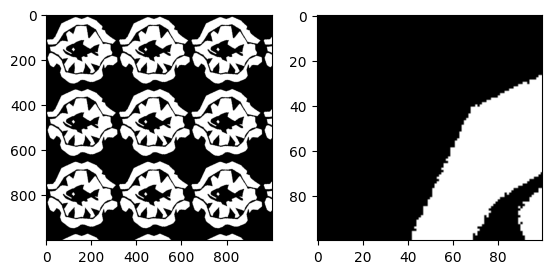

In [249]:
plt.subplot(121); plt.imshow(get_resized_wm(wm, (1000, 1000)), cmap="gray")
plt.subplot(122); plt.imshow(get_resized_wm(wm, (100, 100)), cmap="gray")

In [261]:
def wm_apply(img: np.ndarray, wm: np.ndarray, nbit : int = 1, channel: int = 2) -> np.ndarray:
    applied = img.copy()
    work_space = img[:, :, channel]
    wm = get_resized_wm(wm, img.shape[:2])
    
    mask = (wm.astype(np.uint8) << nbit)
    work_space = work_space.astype(np.uint8) ^ mask

    applied[:, :, channel] = work_space
    return applied

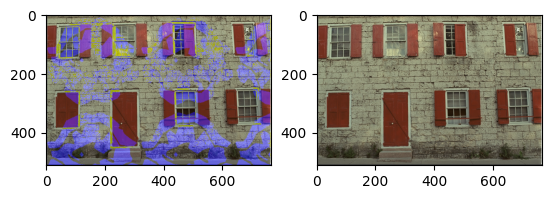

In [262]:
plt.subplot(121); plt.imshow(wm_apply(img1, wm, 7))
plt.subplot(122); plt.imshow(wm_apply(wm_apply(img1, wm, 7), wm, 7))